In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(64, input_shape = (600,6), return_sequences = True))
model.add(GRU(128, return_sequences = False))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 38s 767ms/step - loss: 3.1557 - accuracy: 0.3996 - val_loss: 2.5500 - val_accuracy: 0.4976
Epoch 2/100
40/40 [==============================] - 31s 777ms/step - loss: 2.4709 - accuracy: 0.4915 - val_loss: 2.3134 - val_accuracy: 0.5120
Epoch 3/100
40/40 [==============================] - 36s 902ms/step - loss: 2.2099 - accuracy: 0.5128 - val_loss: 2.0646 - val_accuracy: 0.5568
Epoch 4/100
40/40 [==============================] - 41s 1s/step - loss: 2.0015 - accuracy: 0.5340 - val_loss: 1.8785 - val_accuracy: 0.5632
Epoch 5/100
40/40 [==============================] - 42s 1s/step - loss: 1.7664 - accuracy: 0.5790 - val_loss: 1.8466 - val_accuracy: 0.5872
Epoch 6/100
40/40 [==============================] - 38s 954ms/step - loss: 1.6573 - accuracy: 0.5891 - val_loss: 1.7185 - val_accuracy: 0.6048
Epoch 7/100
40/40 [==============================] - 41s 1s/step - loss: 1.5620 - accuracy: 0.6143 - val_loss: 1.6593 - val_accuracy: 0.6016
E

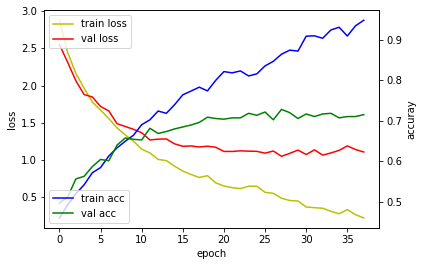

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [5]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN_GRU2.csv', index=False)

In [6]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128, input_shape = (600,6), return_sequences = True))
model.add(GRU(128, return_sequences = False))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 77s 1s/step - loss: 3.0491 - accuracy: 0.4236 - val_loss: 2.4544 - val_accuracy: 0.4976
Epoch 2/100
40/40 [==============================] - 53s 1s/step - loss: 2.3238 - accuracy: 0.5043 - val_loss: 2.1397 - val_accuracy: 0.5440
Epoch 3/100
40/40 [==============================] - 53s 1s/step - loss: 2.0343 - accuracy: 0.5244 - val_loss: 1.8363 - val_accuracy: 0.5904
Epoch 4/100
40/40 [==============================] - 52s 1s/step - loss: 1.7055 - accuracy: 0.5781 - val_loss: 1.7366 - val_accuracy: 0.5888
Epoch 5/100
40/40 [==============================] - 67s 2s/step - loss: 1.5213 - accuracy: 0.6223 - val_loss: 1.5506 - val_accuracy: 0.6144
Epoch 6/100
40/40 [==============================] - 56s 1s/step - loss: 1.3778 - accuracy: 0.6481 - val_loss: 1.4568 - val_accuracy: 0.6480
Epoch 7/100
40/40 [==============================] - 55s 1s/step - loss: 1.2282 - accuracy: 0.6813 - val_loss: 1.3792 - val_accuracy: 0.6512
Epoch 8/100
4

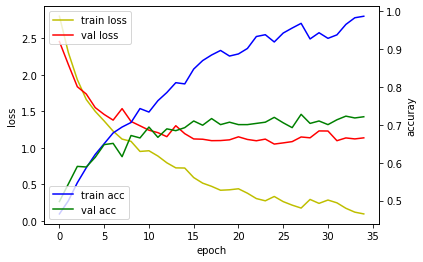

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN_GRU2v2.csv', index=False)

In [9]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(128, input_shape = (600,6), return_sequences = True))
model.add(GRU(128, return_sequences = True))
model.add(GRU(128, return_sequences = False))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 59s 1s/step - loss: 3.0280 - accuracy: 0.4119 - val_loss: 2.3736 - val_accuracy: 0.5104
Epoch 2/100
40/40 [==============================] - 54s 1s/step - loss: 2.3795 - accuracy: 0.4877 - val_loss: 1.9861 - val_accuracy: 0.5472
Epoch 3/100
40/40 [==============================] - 53s 1s/step - loss: 1.9009 - accuracy: 0.5476 - val_loss: 1.7529 - val_accuracy: 0.5760
Epoch 4/100
40/40 [==============================] - 58s 1s/step - loss: 1.6658 - accuracy: 0.5820 - val_loss: 1.7586 - val_accuracy: 0.6000
Epoch 5/100
40/40 [==============================] - 68s 2s/step - loss: 1.5335 - accuracy: 0.6135 - val_loss: 1.5280 - val_accuracy: 0.6112
Epoch 6/100
40/40 [==============================] - 60s 1s/step - loss: 1.3883 - accuracy: 0.6323 - val_loss: 1.4509 - val_accuracy: 0.6368
Epoch 7/100
40/40 [==============================] - 56s 1s/step - loss: 1.2058 - accuracy: 0.6764 - val_loss: 1.3668 - val_accuracy: 0.6592
Epoch 8/100
4

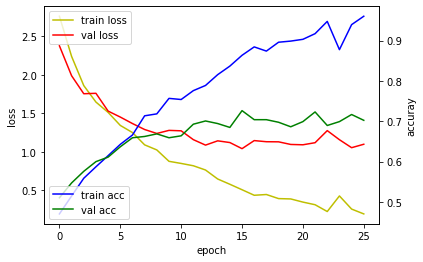

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN_GRU3.csv', index=False)